#Improving Computer Vision Accuracy using Convolutions

지금까지 Deep Neural Network (DNN) 를 이용해서 패션 mnist 를 분류했다.  

CNN Convolutional neural network
ANN Artificial neural network

- Convolutional Layer   
피쳐, 필터, 커널이라고 함  
이미지가 Kernels (2차원 행렬) 처음에는 랜덤으로 셋팅  
(몇행 몇열로 할지는 사람이 정한) - 하이퍼 파라미터  
커널을 몇개로 할지도 하이퍼 파라미터   
Convolutional Layer에서 사진을 필터링을 한다 (연산)

- pooling layer (downsampling)  
2차원을 1차원으로 flatten하게 해서 

[참고 사이트](setosa.io/ev/image-kernels/)


커널은 (피쳐 디텍터 라고도 함)

|커|널| |
|--|--|--|
|0 |-1 |0|
|-1| 5 |-1|
|0 |-1| 0|


원본의 이미지의 숫자 

|원 |본 | |
|--|--|--|
|206 |205 | 247|
|244|161| 137|
|192| 154| 75|

여기에서 커널과 원본의 이미지의 숫자 두개를 곱함  
(0 * 206) + (-1 * 205) + (0 + 247) +  
(-1 * 244) + (5 * 161) + (-1 * 137) +  
(0 * 192) + (-1 * 154) + (0 * 75)   
9개를 각각 곱하고 더한다 --> 312 하나의 값이 나옴  

그리고 오른쪽으로 한칸 이동.   
3 X 3 행렬로 각각 9개를 커널과 원본과 매칭되는 것들끼리 곱하고 다 더함  
그러면 숫자 하나 나옴  
(-가 나오면 0으로 처리, 255 이상이면 255로 처리)  

이런식으로 처리가 된다고 함  

커널 갯수만큼 이미지가 변환되서 나온다  
여기에서 액티베이션 함수를 relu를 적용  
convolution을 마치면 activation함수까지 마쳐진다

원본이미지가 28x28에서 컨볼루션을 거치면 26x26 사이즈로 바뀜 (위,아래,옆 하나씩 빠짐)

(Pooling Layer 전에 이미지가 나옴)  

[참고 사이트](https://poloclub.github.io/cnn-explainer/)

Pooling은 2행 X 2열로 한다고 하면 그대로 2행2열씩 이동
(필터링/커널과 다름)

Dropout 을 통해 Overfitting을 줄인다  
(학습시에는 오차율이 거의 없어서 완벽할정도인데, 신규 데이터가 들어가면 오차가 심해지는 것)





In [1]:
import tensorflow as tf
import tensorflow.keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#fashion_mnist 데이터셋 받아오기
mnist = tf.keras.datasets.fashion_mnist

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Normalization
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Sequential( [ ] ) 안에 리스트 형태로 Flatten(), Dense() 넣어줄 수 있음 
# === model.add( ) 와 같은 효과임
model = Sequential( [
  Flatten(),
  Dense(128, activation='relu'),
  Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

In [ ]:
test_hist = model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6241 - accuracy: 0.7810
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3844 - accuracy: 0.8615
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3397 - accuracy: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3165 - accuracy: 0.8828
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8913


In [ ]:
test_hist.history['accuracy'][-1]

0.8903666734695435

정확도가, 트레이닝셋은 89% 정도이고 테스트셋으로는  87% 정도가 나왔다. 

이제 Convolutional Neural Networks 이용해서 정확도를 향상시켜본다.




In [29]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [30]:
X_train.shape

(60000, 28, 28)

In [31]:
# 3차원 일때 
# 28 x 28짜리 사진이 60,000장이 쭉~ 있다고 생각하면 됨

X_train = X_train.reshape(60000, 28, 28, 1)

In [32]:
X_train = X_train / 255.0

In [8]:
X_test.shape

(10000, 28, 28)

사진 자체가 R G B로 3차원으로 되어 있기 때문에 28 x 28 x 3  
3개 겹쳐서 있어서 혼합을 하면 색깔이 보이게 되는 것  
gray scale은 1로 되어 있어서 28 x 28 x 1  
그래서 4차원으로 변경해서 **Conv2D**를 처리할 때 3차원으로 처리할 수 있게 하는 것  

In [33]:
# 4차원으로 변경
X_test = X_test.reshape(10000 , 28, 28, 1)

In [34]:
X_test = X_test / 255.0

In [11]:
from keras.layers import Conv2D, MaxPooling2D

In [133]:
model = Sequential()

In [134]:
#filters의 갯수는 필터(커널의) 갯수, kernel_size로 만든 것의 갯수, 아래코드는 3x3가 64개라는 의미
#kernel_size= ( , ) 커널의 크기. 아래에서는 3행3열로 만듬
# Conv2D === Convolutional Layer 설정도 하이퍼 파라미터로 밑에 MaxPooling2D와 쌍으로 사용되었는데
# 이것도 하이퍼 파라미터이기 때문에 꼭 쌍으로 안하고 하나씩만 해도 된다
# 정답이 없다
model.add ( Conv2D( filters = 64, kernel_size=(3, 3), activation='relu', input_shape= (28, 28, 1) ) )

In [135]:
# MaxPooling2D - 사진을 줄임 특징은 그대로 가지되, 컴퓨팅 효율을 높힌다
# 얼마나 줄일지 정함 (2, 2) --> 2행2열로 줄임
# 위의 Conv2D로 나온 결과물 커널 수 만큼 64개가 나오게 되는데 
# 그 다음에 MaxPooling2D는 2행2열로 셋팅했다면 그 커널 1개를 2행2열로 훓는다
# 2행2열로만 이동해서 그 영역에서 가장 큰 수만 뽑게 됨
# (풀링에는 숫자가 들어가지고 않고 거기에서 큰 수만 뽑음)
model.add( MaxPooling2D( 2, 2 ) )

In [136]:
# 위에서 MaxPooling2D 처리가 된 것 (원본에서 작아짐) 에서 
# Conv2D를 실행다시 64개의 (3x3)으로 필터링을 진행
# filters=, kernel_size= (,) 생략가능 (순서대로)
model.add( Conv2D(64, (3, 3), activation='relu'))

In [137]:
# 이거를 또 반복
model.add( MaxPooling2D( 2, 2) )


In [138]:
# 마지막 풀링 된 것을 Flatten() 시킴
# 숫자하나씩 일렬로 만듬 이것들 input으로 들어가짐
model.add( Flatten())

In [139]:
# units=생략가능  (처음에 써야함)
# 신경망으로 노드 128개 만들어 짐
model.add( Dense(128, activation='relu') )
model.add( Dense(10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# 첫번째 convolution 에서 찾아야할 컴퓨터가 찾아야할 미지수 Param 640개 (처음에는 랜덤으로 채움)
# 두번째 MaxPooling에서는 찾아야할 것을 없음, 해당 영역에서 가장 큰 것만 뽑아오게 됨

#total params: 처음에 랜덤으로 찾아야할 243,786개

In [140]:
model.compile( optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

모델에서 fit()메소드 적용할 때  
`validation_split=0.2` 파라미터를 적용하면 기존 train셋에서 20%를 제외한 80%로만 학습하고   
20%로는 학습한 데이터로 자체 테스트를 한다  
필요한 이유는 자체 학습을 epochs로 많이 하면 할수록 정확도는 올라가지만  
새로운 데이터를 넣어서 예측할 때에는 오차는 커지고 정확도 떨어지는   
현상 overfitting이 일어나는데 
그래서 이것을 추후 history에서 알 수가 있다.   
차트를 그려서 좋은 epochs 횟수를 찾을 수 있다


In [141]:
# validation_split=0.25 ---> X_train에 있는 데이터를 각 에포크를 할 때 75%만 학습을 하고 25%로 검증을 해보라는 것
model_hist = model.fit(X_train, y_train, epochs=6, batch_size=100, validation_split=0.25, callbacks=[ myCallback ])

Epoch 1/6
450/450 [==============================] - 3s 5ms/step - loss: 0.8058 - accuracy: 0.7164 - val_loss: 0.3815 - val_accuracy: 0.8656
Epoch 2/6
450/450 [==============================] - 2s 5ms/step - loss: 0.3691 - accuracy: 0.8677 - val_loss: 0.3344 - val_accuracy: 0.8795
Epoch 3/6
450/450 [==============================] - 2s 5ms/step - loss: 0.3079 - accuracy: 0.8894 - val_loss: 0.3271 - val_accuracy: 0.8773
Epoch 4/6
450/450 [==============================] - 2s 5ms/step - loss: 0.2777 - accuracy: 0.8985 - val_loss: 0.2906 - val_accuracy: 0.8963
Epoch 5/6
450/450 [==============================] - 2s 5ms/step - loss: 0.2524 - accuracy: 0.9075 - val_loss: 0.2703 - val_accuracy: 0.9016
Epoch 6/6
450/450 [==============================] - 2s 5ms/step - loss: 0.2263 - accuracy: 0.9162 - val_loss: 0.2694 - val_accuracy: 0.9029

정확도 91.0가 되어서 학습을 종료합니다


In [100]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8888


트레이닝셋은 93% , 테스트셋은 91% 까지 나온다.


에포크를 20까지 해보면, 트레이닝셋 정확도는 올라가지만 밸리데이션 정확도는 내려간다. 즉, 오버핏팅이 된다.



In [28]:
# 마지막결과
model_hist.history['loss'][-1]

0.3052496016025543

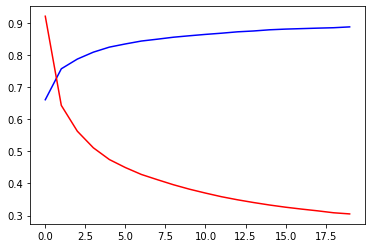

In [23]:
# 일반적 차트로는 계속 진행된 loss와 accuracy만 볼 수 있었음
# 이걸로는 overfitting을 알 수가 없다
# 왜냐하면 학습 데이터를 계속 에포크로 반복해서 했기 때문에 정확도는 좋아지고 오차는 낮아짐
#
plt.plot(model_hist.history['accuracy'], color = 'b')
plt.plot(model_hist.history['loss'], color ='r')
plt.show()

Overfitting 확인

In [ ]:
import matplotlib.pyplot as plt

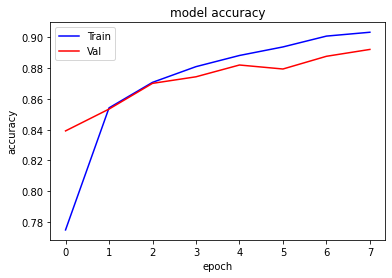

In [101]:
plt.plot(model_hist.history['accuracy'], color = 'b')
plt.plot(model_hist.history['val_accuracy'], color ='r')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train', 'Val']) #Val은 training셋에서 자체 25%테스트 한 것
plt.show()

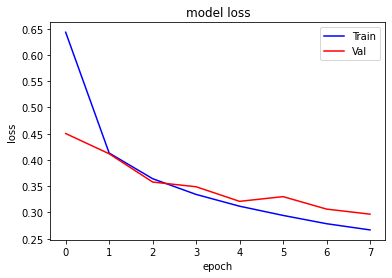

In [102]:
plt.plot(model_hist.history['loss'], color = 'b')
plt.plot(model_hist.history['val_loss'], color ='r')
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Train', 'Val']) #Val은 training셋에서 자체 25%테스트 한 것
plt.show()

In [ ]:
# 위의 결과로 
# 정확도가 높거나, 로스가 적은것을 찾아야 한다 


In [105]:
#컨볼류션 필터 갯수를 16으로 해서 정확도 확인
model_hist.history['accuracy'][-1]

0.9033777713775635

In [122]:
#컨볼류션 필터 갯수를 64으로 해서 정확도 확인
model_hist.history['accuracy'][-1]

0.9276000261306763

In [131]:
# 맨 마지막 컨볼류션 지우고 해본다
model_hist.history['accuracy'][-1]

0.9141111373901367

In [132]:
# callbacks 를 이용해서 돌리기
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        i = 0.91
        if (logs.get('accuracy') > i ):
           print("\n정확도 {}가 되어서 학습을 종료합니다".format(i*100))  
           self.model.stop_training = True
        # logs.get('loss')로 하게 되면 lost 결과로 계산할 수 있음
#객체 생성
myCallback = myCallback()

In [142]:
# 정확도 (callbacks)
model_hist.history['accuracy'][-1]

0.9168221950531006





```py
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
```



다음처럼 모델링 해서 돌려보자


```
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
```


convolution 레이어 셋팅



```
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2)
```


DNN 구조를 붙이기 위해, 플래튼 한다.

```
  tf.keras.layers.Flatten(),
```


128 dense layers 와 10 output layers 를 셋팅한다.



```
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
```


컴파일하여 학습하고, 평가해 보자



```
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_acc)
```


# Visualizing the Convolutions and Pooling



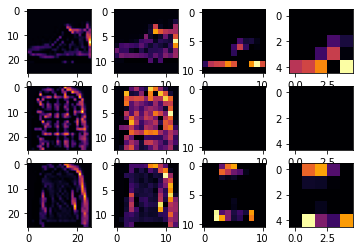

In [ ]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(X_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(X_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(X_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

EXERCISES

1. 컨볼루션 필터 갯수를 16 또는  64로 바꿔서 정확도를 확인하라.  

2. 맨 마지막 컨볼루션 지우고 해본다.

3. 콜백 셋팅해서 돌려본다.